In [1]:
import matplotlib.pyplot as plt
import nibabel as nib
import numpy as np

# Plotting charts

Let's generate some random example data to plot.

We'll say we've got eight recordings taken simultaneously over six timepoints

In [2]:
RNG = np.random.default_rng(1)
x_data = np.linspace(0, 2, 6)
y_data = RNG.uniform(-0.75, 0.75, (6, 8))
y_data.shape

(6, 8)

We see that we've got a 6 by 8 numpy array of data.

We'll start by just plotting one of our 8 recordings.

In [4]:
y_data_0 = y_data[:, 0]
y_data_0.shape

(6,)

The simplest way to plot this data would be something like this:

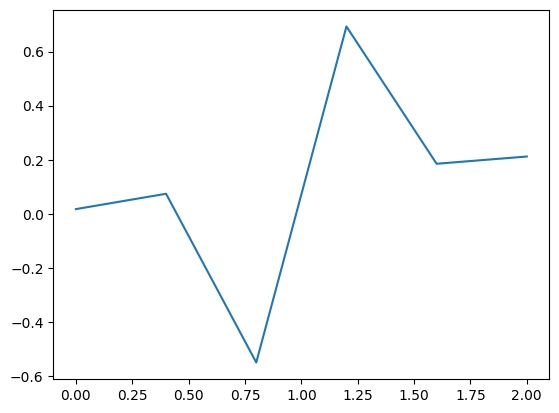

In [15]:
fig, ax = plt.subplots()
ax.plot(x_data, y_data_0)
plt.show()

There's plenty we could do to improve this plot:

- It's quite big for such a small amount of data
  - Relatedly, we haven't specified anything about the size or resolution.
- There are more x-ticks than data points, so they could be specific.
- We have an unnecessary bounding box.
- We could take Tufte's suggestion to remove or limit the axes to show the extent of the data.
- The line's colour doesn't indicate anything, so it may as well be black.
- There are no labels on the x- or y- axes.

## Plot size

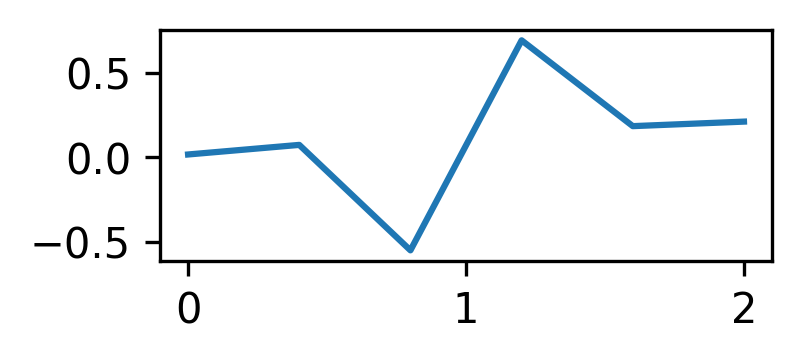

In [10]:
fig, ax = plt.subplots(
    figsize=(2.63, 1),
    dpi=300,
)
ax.plot(x_data, y_data_0)
plt.show()

- matplotlib specifies figure sizes in inches
- The plot size will change as we add labels and other subplots, so we'll have to revisit it.
- Finding the right size for the data under a journal's constraints often takes experimentation.

## Specific x-ticks

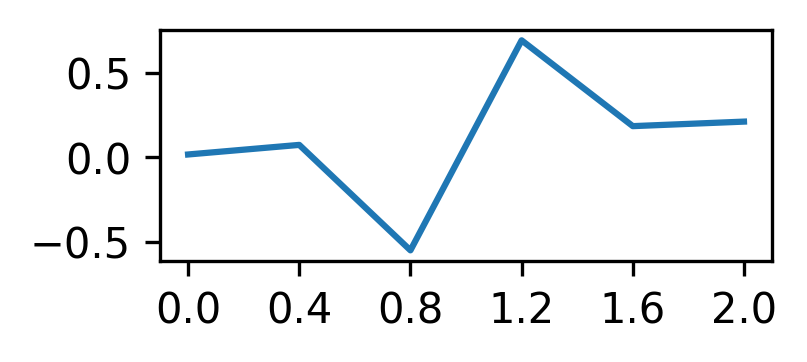

In [14]:
fig, ax = plt.subplots(
    figsize=(2.63, 1),
    dpi=300,
)
ax.plot(x_data, y_data_0)
ax.set_xticks(x_data)
plt.show()

- If there were more x data, we could take a regular sample of it, but this lets us see all the values.
- The y ticks in this case seem fine; there is too little space to show every data point.

## Bounding box

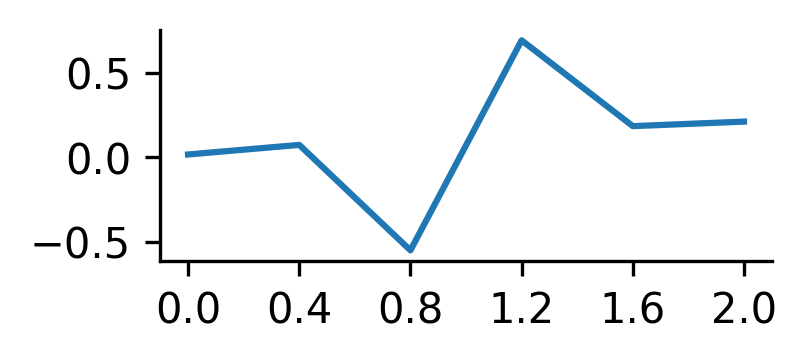

In [16]:
fig, ax = plt.subplots(
    figsize=(2.63, 1),
    dpi=300,
)
ax.plot(x_data, y_data_0)
ax.set_xticks(x_data)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.show()

## x- and y- axes

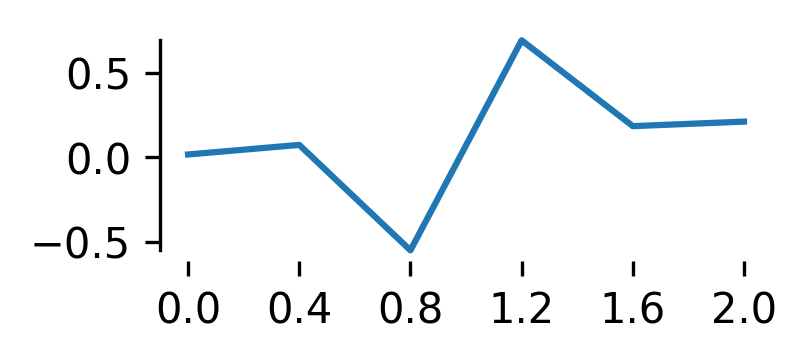

In [17]:
fig, ax = plt.subplots(
    figsize=(2.63, 1),
    dpi=300,
)
ax.plot(x_data, y_data_0)
ax.set_xticks(x_data)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_bounds((min(y_data_0), max(y_data_0)))
plt.show()

- The x-axis doesn't show any information and the bounds of the independent variable are clear, so get rid of it.
- The y-axis now shows the bounds of the dependent variable, but it may not be obvious to a reader without noting it in the figure's caption.

## Line colour

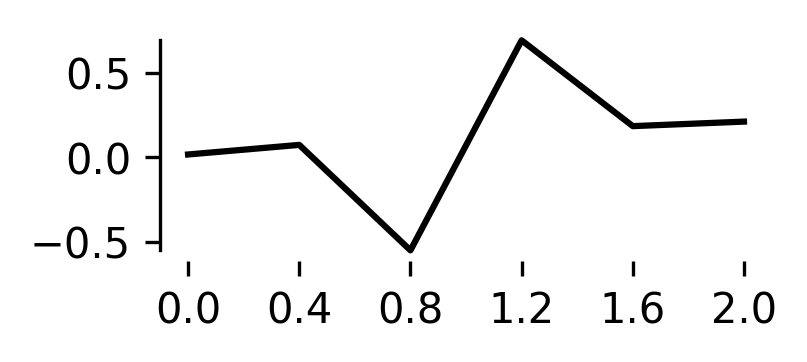

In [18]:
fig, ax = plt.subplots(
    figsize=(2.63, 1),
    dpi=300,
)
ax.plot(x_data, y_data_0, color="black")  ## Added color arg
ax.set_xticks(x_data)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_bounds((min(y_data_0), max(y_data_0)))
plt.show()

- There are lots of other line properties you can change if you want to.

## Axis labels

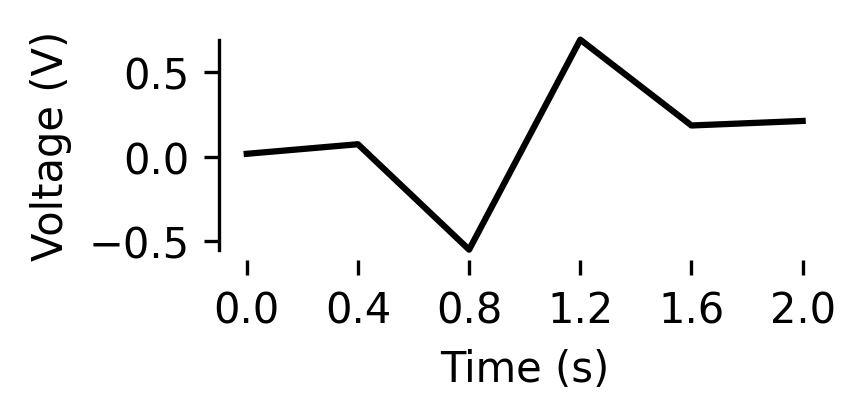

In [8]:
fig, ax = plt.subplots(
    figsize=(2.63, 1),
    dpi=300,
)
ax.plot(x_data, y_data_0, color="black")  ## Added color arg
ax.set_xticks(x_data)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_bounds((min(y_data_0), max(y_data_0)))
ax.set_xlabel("Time (s)")
ax.set_ylabel("Voltage (V)")
plt.show()

## Adding the other channels

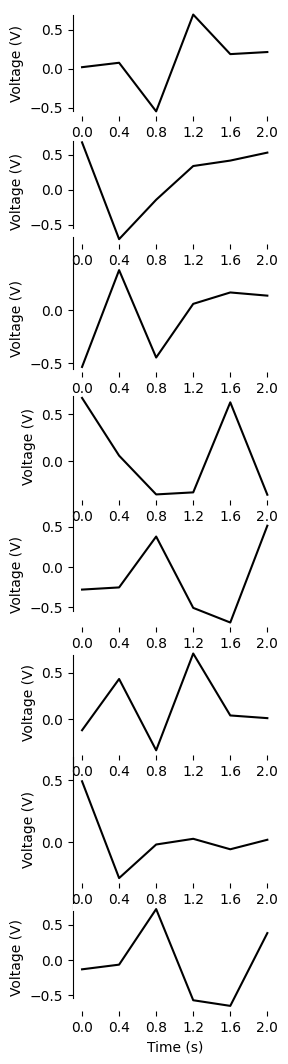

In [9]:
fig, all_ax = plt.subplots(
    nrows=8,
    ncols=1,
    figsize=(2.63, 13), # 8 * original height plus extra room for x tick labels
    dpi=100,  # lower DPI to be able to see the whole thing
)
for idx, ax in enumerate(all_ax):
    ax.plot(x_data, y_data[:, idx], color="black")  ## Added color arg
    ax.set_xticks(x_data)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_bounds((min(y_data_0), max(y_data_0)))
    ax.set_xlabel("Time (s)")
    ax.set_ylabel("Voltage (V)")
plt.show()

We've got all our plots, but there are again some aspects that could be better.

- All the data have the same independent variables, so they don't all need x tick labels.
- It would be nice if all the plots had the same y-axis bounds to make them more easily comparable.
- The channels all have the same y label.
  - It would be good to indicate the channel each dataset comes from and add an overall y label to indicate the quantity being measured.

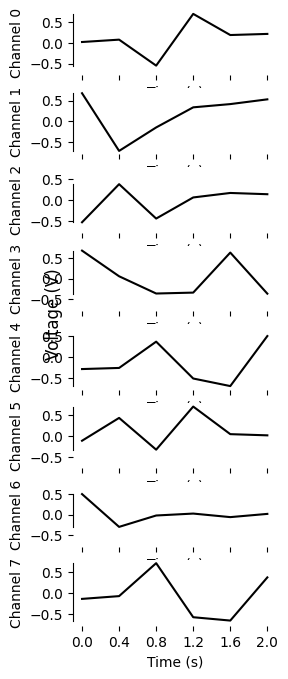

In [15]:
fig, all_ax = plt.subplots(
    nrows=8,
    ncols=1,
    sharex=True,
    sharey=True,
    figsize=(2.63, 8),
    dpi=100,  # lower DPI to be able to see the whole thing
)
for idx, ax in enumerate(all_ax):
    ax.plot(x_data, y_data[:, idx], color="black")  ## Added color arg
    ax.set_xticks(x_data)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_bounds((min(y_data[:, idx]), max(y_data[:, idx])))
    ax.set_xlabel("Time (s)")
    ax.set_ylabel(f"Channel {idx}")
fig.supylabel("Voltage (V)")
plt.show()

- We've fixed all our issues but the `supylabel` has ended up under our subplots.
- In situations like this (where plot elements are overlapping or cut off), you can use `tight_layout` or `constrained_layout`.

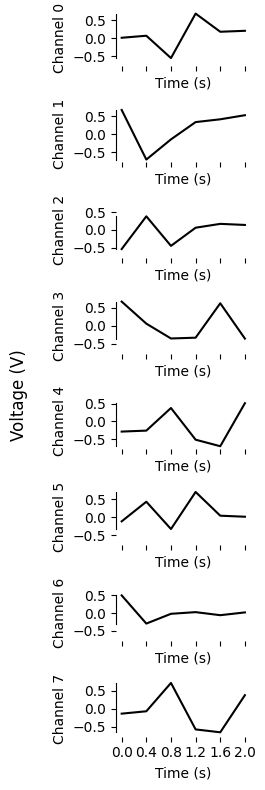

In [16]:
fig, all_ax = plt.subplots(
    nrows=8,
    ncols=1,
    sharex=True,
    sharey=True,
    figsize=(2.63, 8),
    dpi=100,  # lower DPI to be able to see the whole thing
    layout="tight",
)
for idx, ax in enumerate(all_ax):
    ax.plot(x_data, y_data[:, idx], color="black")  ## Added color arg
    ax.set_xticks(x_data)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_bounds((min(y_data[:, idx]), max(y_data[:, idx])))
    ax.set_xlabel("Time (s)")
    ax.set_ylabel(f"Channel {idx}")
fig.supylabel("Voltage (V)")
plt.show()

- This is better, but we've gotten all the x labels back, so let's make one last adjustment:

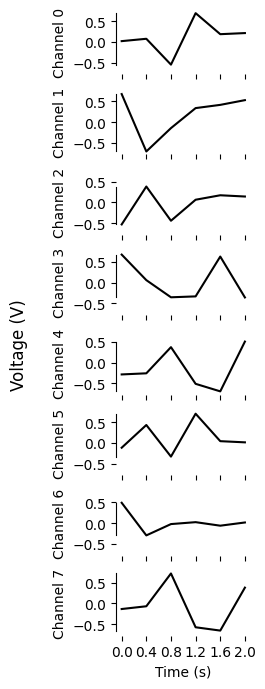

In [18]:
fig, all_ax = plt.subplots(
    nrows=8,
    ncols=1,
    sharex=True,
    sharey=True,
    figsize=(2.63, 7),
    dpi=100,  # lower DPI to be able to see the whole thing
    layout="tight",
)
for idx, ax in enumerate(all_ax):
    ax.plot(x_data, y_data[:, idx], color="black")  ## Added color arg
    ax.set_xticks(x_data)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_bounds((min(y_data[:, idx]), max(y_data[:, idx])))
    ax.set_ylabel(f"Channel {idx}")
    if idx == len(all_ax) - 1:
        ax.set_xlabel("Time (s)")

fig.supylabel("Voltage (V)")
plt.show()

- This gets us a fully labeled and aligned sequence of plots.
- Now, make sure to adjust text (size/font), resolution, and size to accommodate journal requirements.

# Miscellaneous plots

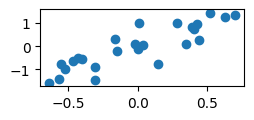

In [29]:
data_1 = RNG.uniform(-0.75, 0.75, (25))
data_2 = (data_1 * 2) + RNG.normal(scale=0.5, size=(25))

fig, ax = plt.subplots(figsize=(2.63, 1))
ax.scatter(data_1, data_2)
plt.show()

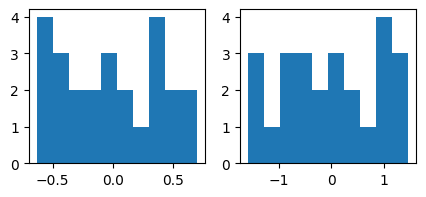

In [30]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(5, 2))
ax[0].hist(data_1)
ax[1].hist(data_2)
plt.show()

# Plotting images

Let's load a diffusion-weighted image (DWI) I grabbed from OpenNeuro (https://openneuro.org/datasets/ds001378/).

In [ ]:
dwi_img = nib.load("dataviz_tutorial/resources/sub-control01_ses-01_dwi.nii.gz").get_fdata()
dwi_img.shape

We see that `dwi_img` is a four-dimensional image with 16 three-dimensional acquisitions.

Say we'd like to include a figure showing this four-dimensional image in a paper. This is a good candidate for Tufte's "small multiples", but we'll start by displaying one axial slice of the first acquisition nicely.

In [ ]:
# numpy slice selection
# we're getting the 25th axial slice of the first acquisition.
acquisition_1 = dwi_img[:, :, :, 0]
axial_slice = acquisition_1[:, :, 25]

In [ ]:
# We'll use the same figure setup several times, so make it a function
def std_fig():
    return plt.subplots(figsize=(2.63, 2.63), dpi=300)

In [ ]:
# What does the default image look like?
_, ax = std_fig()
ax.imshow(axial_slice)
plt.show()

We see our image! But there are a few things we could improve...

- Inappropriate colourmap
- Lots of blank space around the region of interest
- Ticks we don’t care about
- Unusual orientation
- Only one slice of our 4D image

## Colourmap

In [ ]:
_, ax = std_fig()
ax.imshow(axial_slice, cmap="gray")
plt.show()

- Built-in colormaps are accessible by name (see `matplotlib.colormaps`, https://matplotlib.org/stable/tutorials/colors/colormaps.html)
- Think about the nature of your data and pick something appropriate
  - Sequential vs. diverging vs. cyclic vs. qualitative
- In this context, grayscale (a sequential colourmap) is standard

In [ ]:
import matplotlib
from pprint import pp
pp(matplotlib.colormaps())

## Cropping

In [ ]:
_, ax = std_fig()
# numpy array slice selection
ax.imshow(axial_slice[15:115, 15:115], cmap="gray")
plt.show()

- Some trial and error is usually necessary to find the right slices
- I maintained a square image here but could also have cropped the L-R axis a bit more.

## Removing ticks

In [ ]:
_, ax = std_fig()
ax.imshow(axial_slice[15:115, 15:115], cmap="gray")
ax.tick_params(
    axis="both",
    which="both",
    bottom=False,
    left=False,
    labelbottom=False,
    labelleft=False,
)
plt.show()

- `tick_params` offers a lot of control of your ticks generally

## Changing the orientation

In [ ]:
_, ax = std_fig()
ax.imshow(
    axial_slice[15:115, 15:115].T,  # Show LR axis in the horizontal direction
    cmap="gray",
    origin="lower",  # Move (0, 0) from top left to bottom left
)
ax.tick_params(
    axis="both",
    which="both",
    bottom=False,
    left=False,
    labelbottom=False,
    labelleft=False,
)
ax.invert_xaxis()  # Show image in neurological orientation
plt.show()

- Depending on how your data is stored, you may need to try different options to get the orientation you want.
- It's a good idea to double check against how an image appears in 3DSlicer or another NIfTI viewer.

## Tiling your image with subplots

- We want to show more than one axial slice from our first acquisition
- We'll do this using subplots

In [ ]:
fig, all_ax = plt.subplots(nrows=4, ncols=1, figsize=(2, 8), dpi=100)
slices = [10, 20, 30, 40]
for slice_idx, ax in zip(slices, all_ax):
    slice_ = acquisition_1[:, :, slice_idx]
    ax.imshow(
        slice_[15:115, 15:115].T,
        cmap="gray",
        origin="lower",
    )
    ax.tick_params(
        axis="both",
        which="both",
        bottom=False,
        left=False,
        labelbottom=False,
        labelleft=False,
    )
    ax.invert_xaxis()
plt.show()

- This looks pretty good, but there are some changes that would be good:
  - Get rid of the margins between the images
  - Add a label indicating that the most inferior images are at the top of the graphic

In [ ]:
fig, all_ax = plt.subplots(nrows=4, ncols=1, figsize=(2, 8), dpi=100)
slices = [10, 20, 30, 40]
for slice_idx, ax in zip(slices, all_ax):
    slice_ = acquisition_1[:, :, slice_idx]
    ax.imshow(
        slice_[15:115, 15:115].T,
        cmap="gray",
        origin="lower",
    )
    ax.tick_params(
        axis="both",
        which="both",
        bottom=False,
        left=False,
        labelbottom=False,
        labelleft=False,
    )
    ax.invert_xaxis()
fig.supylabel("Superior <--> Inferior")  # supylabel: "Super y label", across all subplots
fig.subplots_adjust(hspace=0)  # hspace: "height space", no padding between subplots
plt.show()

- This looks good, so let's add a few columns to display more acquisitions.

In [ ]:
fig, all_ax = plt.subplots(nrows=4, ncols=4, figsize=(8, 8), dpi=100)
slices = [10, 20, 30, 40]
acquisitions = [0, 1, 2, 3]
for col_idx, acq_idx in enumerate(acquisitions):
    for row_idx, slice_idx in enumerate(slices):
        ax = all_ax[row_idx, col_idx]
        slice_ = dwi_img[:, :, slice_idx, acq_idx]
        ax.imshow(
            slice_[15:115, 15:115].T,
            cmap="gray",
            origin="lower",
        )
        ax.tick_params(
            axis="both",
            which="both",
            bottom=False,
            left=False,
            labelbottom=False,
            labelleft=False,
        )
        ax.invert_xaxis()
fig.supylabel("Superior <--> Inferior")
fig.subplots_adjust(hspace=0)
plt.show()

- Now we've got all our data, but:
  - The padding is back
  - It would be nice to title each column with the acquisition it came from.

In [ ]:
fig, all_ax = plt.subplots(nrows=4, ncols=4, figsize=(8, 8), dpi=100)
slices = [10, 20, 30, 40]
acquisitions = [0, 1, 2, 3]
for col_idx, acq_idx in enumerate(acquisitions):
    for row_idx, slice_idx in enumerate(slices):
        ax = all_ax[row_idx, col_idx]
        slice_ = dwi_img[:, :, slice_idx, acq_idx]
        ax.imshow(
            slice_[15:115, 15:115].T,
            cmap="gray",
            origin="lower",
        )
        ax.tick_params(
            axis="both",
            which="both",
            bottom=False,
            left=False,
            labelbottom=False,
            labelleft=False,
        )
        ax.invert_xaxis()
        if row_idx == 0:  # i.e. if we're in the top row of the column
            ax.set_title(f"Acquisition {acq_idx}")
fig.supylabel("Superior <--> Inferior")
fig.subplots_adjust(hspace=0, wspace=0)  # added wspace because it's a 2D grid now.
plt.show()

- Now we've got a full image showing our data.
- You may see a white line between two of the columns -- adjusting the dpi would fix that.
- Remember to adjust text size, image size, and DPI to accommodate journal requirements.